In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [32]:
ROCK, PAPER, SCISSORS = 0,1,2
NUM_ACTIONS = 3
oppStrategy = np.array([0.4, 0.3, 0.3])

def value(p1, p2):
  if p1==p2:
    return 0
  elif p1==ROCK and p2==SCISSORS:
    return 1
  elif p1==SCISSORS and p2==PAPER:
    return 1
  elif p1==PAPER and p2==ROCK:
    return 1
  else:
    return -1

In [33]:
def normalize(strategy):
  strategy = np.copy(strategy)
  normalizingSum = np.sum(strategy)
  if normalizingSum > 0:
    strategy /= normalizingSum
  else:
    strategy = np.ones(strategy.shape[0])/(strategy.shape[0])
  return strategy

# accumulates in strategySum
def getStrategy(regretSum):
  #Get current mixed strategy through regret-matching
  #the strategy you use is the one with maximum regret
  return normalize(np.maximum(regretSum, 0))


def getAction(strategy):
  #Get random action according to mixed-strategy distribution
  strategy = strategy/np.sum(strategy) #normalize
  return np.searchsorted(np.cumsum(strategy), random.random())

In [34]:
print(normalize(np.zeros(NUM_ACTIONS)))

[0.33333333 0.33333333 0.33333333]


In [35]:
def inner_train(regretSum, strategySum, oppStrategy):
    #accumulate the current strategy based on regret
    strategy = getStrategy(regretSum)
    strategySum += strategy

    #select my action and opponent action
    myAction = getAction(strategy)
    oppAction = getAction(oppStrategy)
    # we compute the utility of each possible action from the perspective of the player playing myAction

    #for rock, paper, scissors
    actionUtility = np.zeros(NUM_ACTIONS)
    actionUtility[oppAction] = 0
    actionUtility[(oppAction+1) % NUM_ACTIONS] = 1
    actionUtility[(oppAction-1) % NUM_ACTIONS] = -1
    #acc
    regretSum += actionUtility - actionUtility[myAction]
    return regretSum, strategySum


def train(iterations):
  regretSum = np.zeros(NUM_ACTIONS)
  strategySum = np.zeros(NUM_ACTIONS)
  oppStrategy = np.array([0.4, 0.3, 0.3])
  
  for i in range(iterations):
    regretSum, strategySum = inner_train(regretSum, strategySum, oppStrategy)
    
  return strategySum

def train2p(oiterations, iterations):
  strategySumP1 = np.zeros(NUM_ACTIONS)
  strategySumP2 = np.zeros(NUM_ACTIONS)

  for j in range(oiterations):
    oppStrategy = normalize(strategySumP2)
    regretSumP1 = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
      regretSumP1, strategySumP1 = inner_train(regretSumP1, strategySumP1, oppStrategy)

    oppStrategy = normalize(strategySumP1)
    regretSumP2 = np.zeros(NUM_ACTIONS)
    for i in range(iterations):
      regretSumP2, strategySumP2 = inner_train(regretSumP2, strategySumP2, oppStrategy)
    print(normalize(strategySumP1), normalize(strategySumP2))

  return strategySumP1, strategySumP2

s1, s2 = train2p(40, 1000)
normalize(s1), normalize(s2)

[0.46478384 0.48499986 0.0502163 ] [0.0005     0.99766667 0.00183333]
[0.23255859 0.24283327 0.52460815] [0.49958333 0.49916667 0.00125   ]
[0.15515017 0.49205869 0.35279115] [0.3393539  0.33462751 0.32601859]
[0.18748665 0.54548682 0.26702653] [0.25459876 0.2511373  0.49426394]
[0.34915599 0.43652279 0.21432122] [0.20379567 0.39561032 0.40059401]
[0.29781795 0.36382455 0.3383575 ] [0.17921893 0.33130119 0.48947988]
[0.33981875 0.31194485 0.34823639] [0.19559958 0.37919171 0.42520871]
[0.29792474 0.27313924 0.42893601] [0.29422671 0.33191775 0.37385554]
[0.35352641 0.25087749 0.3955961 ] [0.34947701 0.31115579 0.3393672 ]
[0.33464664 0.30923909 0.35611426] [0.32516184 0.30557836 0.3692598 ]
[0.34366051 0.28115675 0.37518274] [0.37736478 0.28164766 0.34098757]
[0.3597997  0.29218803 0.34801228] [0.42107679 0.25821868 0.32070453]
[0.35344484 0.32528742 0.32126774] [0.40850782 0.28042083 0.31107135]
[0.33176033 0.3698605  0.29837917] [0.39040764 0.32000459 0.28958777]
[0.30975408 0.411736

(array([0.33555946, 0.3775123 , 0.28692824]),
 array([0.34175376, 0.32100897, 0.33723726]))

Nash Equilibrium reached

In [36]:
s1, s2 = train2p(10, 10000)
normalize(s1), normalize(s2)

[0.25820315 0.55070389 0.19109296] [0.00016667 0.00016667 0.99966667]
[0.62906824 0.27536861 0.09556315] [0.00011667 0.50001667 0.49986667]
[0.41981819 0.1836013  0.39658051] [0.3319491  0.33467431 0.33337659]
[0.31804011 0.37297299 0.3089869 ] [0.24928146 0.25133286 0.49938568]
[0.45440542 0.29839172 0.24720285] [0.1994385  0.40103962 0.39952188]
[0.37879958 0.24867088 0.37252954] [0.33207617 0.33497783 0.33294601]
[0.34303497 0.24143795 0.41552708] [0.42747481 0.28713338 0.28539182]
[0.30023685 0.33615612 0.36360703] [0.43028192 0.25127664 0.31844144]
[0.26747017 0.40931988 0.32320995] [0.38259874 0.22352923 0.39387202]
[0.33873863 0.37036908 0.29089229] [0.34464473 0.29990524 0.35545003]


(array([0.33873863, 0.37036908, 0.29089229]),
 array([0.34464473, 0.29990524, 0.35545003]))

In [37]:
strategySum = train(10000)
normalize(strategySum)

# which makes sense for our opp's strategy. should have been (0,1,0)

array([0.00858483, 0.99138184, 0.00003333])

In [38]:
strategy, oppStrategy = normalize(s1), normalize(s2)
strategy, oppStrategy

(array([0.33873863, 0.37036908, 0.29089229]),
 array([0.34464473, 0.29990524, 0.35545003]))

([<matplotlib.lines.Line2D at 0x7f05ec9d0b80>], -1.465)

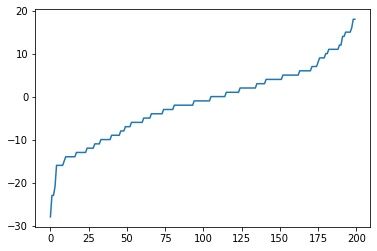

In [39]:

vvv = []
for j in range(200):
  vv = 0
  for i in range(100):
    strategy = normalize(strategySum)
    #strategy = np.array([0,1,0]) - our intuitive solution to opp's strategy of 0.4, 0.3, 0.3
    myAction = getAction(strategy)
    oppAction = getAction(oppStrategy)
    #regret of myAction vs oppAction utilities
    vv += value(myAction, oppAction)
  vvv.append(vv)
  
plt.plot(sorted(vvv)), np.mean(vvv)